# DBSCAN Noise Points

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that explicitly identifies noise points - points that don't belong to any cluster. These noise points are the natural outliers detected by DBSCAN.


Core points: Have enough neighbors within ε distance (≥ min_samples)

Border points: Belong to a cluster but aren't core points

Noise points: Don't belong to any cluster (labeled as -1)


### How DBSCAN Identifies Noise
The Algorithm:
For each point:

Count neighbors within ε distance

If ≥ min_samples → core point (starts a new cluster)

Expand clusters:

Add all reachable points (core points' neighbors)

Remaining points:

Points not assigned to any cluster → noise (label = -1)


Mathematical Definition:
Let dataset D = {x₁, x₂, ..., xₙ}

ε-neighborhood:


``` N_ε(p) = {q ∈ D | distance(p, q) ≤ ε}```
Core point condition:


``` |N_ε(p)| ≥ min_samples ```
Noise point:
A point p is noise if:

p is not a core point

p is not density-reachable from any core point

### Step-by-Step Example
```bash 
Dataset:


A: [1, 1]
B: [1, 2]
C: [2, 1]
D: [2, 2]    ← Cluster 1 (dense)
E: [8, 8]
F: [8, 9]
G: [9, 8]    ← Cluster 2 (dense)
H: [20, 20]  ← Noise point (isolated)
Parameters: ε = 2, min_samples = 3

Step 1: Check each point
Point A:

Neighbors within ε=2: B(1.0), C(1.0), D(1.41) → 3 neighbors

Core point (≥ min_samples=3)

Point H:

Neighbors within ε=2: None

Not a core point

Step 2: Expand clusters
From core point A:

Add B, C, D → All become part of Cluster 1

From cluster points in Cluster 1:

Continue expanding until no more reachable points

Point H is never reached → Noise point

Result:
Cluster 1: A, B, C, D (label = 0)

Cluster 2: E, F, G (label = 1)

Noise: H (label = -1)

```

=== Example 1: DBSCAN Noise Analysis ===
Total points: 280
Noise points: 39 (13.9%)
Clusters found: 3

=== Noise Characteristics Analysis ===
Isolation analysis:
  Noise points are 11.7x more isolated than cluster points

Density comparison:
  Noise points have 0.0x fewer neighbors than cluster points

Boundary analysis:
  5 noise points near cluster boundaries (12.8%)
  34 noise points far from all clusters

=== Detailed Analysis of First 3 Noise Points ===

Noise point 0:
  Coordinates: [5.30902861 7.31163889]
  Neighbors within ε: 0
  Distance to nearest cluster: 1.325
  Reason: Too few neighbors (0 < 10)
  Borderline: True

Noise point 1:
  Coordinates: [3.0552396  4.38536742]
  Neighbors within ε: 0
  Distance to nearest cluster: 1.030
  Reason: Too few neighbors (0 < 10)
  Borderline: True

Noise point 2:
  Coordinates: [-7.85655977 -1.05175266]
  Neighbors within ε: 1
  Distance to nearest cluster: 3.532
  Reason: Too few neighbors (1 < 10)
  Borderline: False


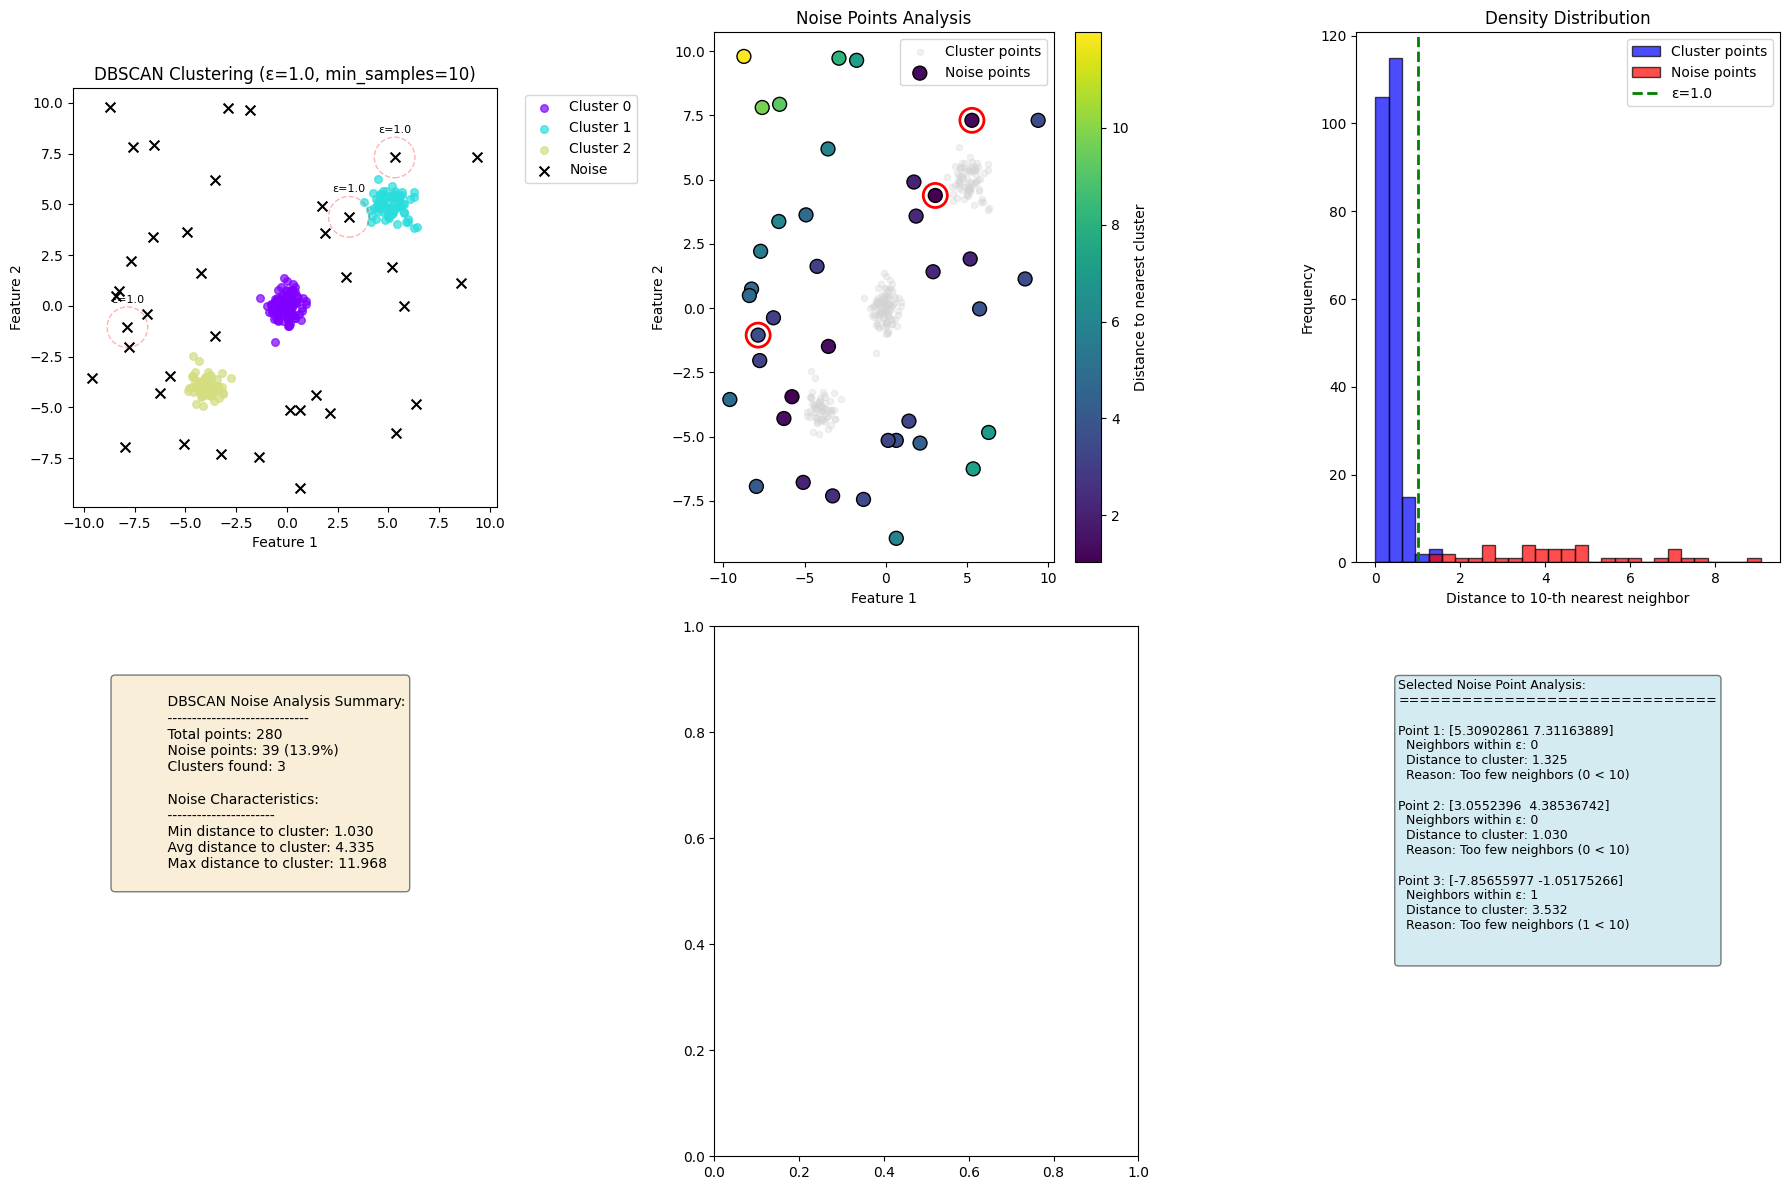


=== Example 2: Parameter Sensitivity Analysis ===

Noise percentage for different parameter combinations:
min_samples         3          5          10          15          20
eps                                                                 
0.234187     26.071429  35.714286  68.928571  100.000000  100.000000
0.544953     15.714286  16.071429  17.857143   20.000000   20.714286
0.855720     14.285714  14.285714  14.285714   14.285714   15.000000
1.166487     10.357143  12.857143  13.214286   13.214286   13.214286
1.477253      8.928571  11.428571  11.428571   12.142857   12.500000
1.788020      7.142857  11.428571  11.428571   11.428571   11.428571
2.098786      6.071429   8.928571  11.071429   11.071429   11.071429
2.409553      3.214286   7.857143  10.357143   10.357143   10.357143
2.720320      2.857143   6.428571   9.285714    9.285714    9.285714
3.031086      2.142857   4.642857   8.571429    8.928571    8.928571

=== Example 3: Customer Segmentation with DBSCAN ===

Customer S

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

class DBSCANNoiseAnalyzer:
    """
    Comprehensive DBSCAN noise point analysis
    """
    
    def __init__(self, eps=0.5, min_samples=5):
        self.eps = eps
        self.min_samples = min_samples
        self.dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        self.noise_points_ = None
        self.noise_indices_ = None
        self.cluster_stats_ = None
    
    def fit_predict(self, X):
        """
        Fit DBSCAN and analyze noise points
        """
        X = np.array(X)
        self.X = X
        
        # Fit DBSCAN
        labels = self.dbscan.fit_predict(X)
        self.labels = labels
        
        # Identify noise points (label = -1)
        self.noise_mask = labels == -1
        self.noise_indices_ = np.where(self.noise_mask)[0]
        self.noise_points_ = X[self.noise_mask]
        
        # Identify clusters
        self.cluster_mask = labels != -1
        self.cluster_points_ = X[self.cluster_mask]
        self.cluster_labels_ = labels[self.cluster_mask]
        
        # Calculate statistics
        self._calculate_statistics()
        
        return labels
    
    def _calculate_statistics(self):
        """Calculate comprehensive statistics about noise points"""
        n_total = len(self.X)
        n_noise = len(self.noise_points_)
        n_clusters = len(set(self.labels)) - (1 if -1 in self.labels else 0)
        
        # Basic stats
        self.stats_ = {
            'n_total': n_total,
            'n_noise': n_noise,
            'n_clusters': n_clusters,
            'noise_percentage': n_noise / n_total * 100,
            'clusters_found': list(set(self.labels[self.labels != -1]))
        }
        
        # Distance analysis for noise points
        if n_noise > 0:
            # Distance to nearest non-noise point for each noise point
            from scipy.spatial import cKDTree
            tree = cKDTree(self.cluster_points_)
            distances, _ = tree.query(self.noise_points_, k=1)
            self.stats_['noise_to_cluster_dist'] = {
                'min': np.min(distances),
                'max': np.max(distances),
                'mean': np.mean(distances),
                'median': np.median(distances),
                'std': np.std(distances)
            }
        
        # Cluster sizes
        unique_labels, counts = np.unique(self.cluster_labels_, return_counts=True)
        self.stats_['cluster_sizes'] = dict(zip(unique_labels, counts))
        
        return self.stats_
    
    def analyze_noise_characteristics(self):
        """
        Analyze why points were classified as noise
        """
        if self.noise_points_ is None or len(self.noise_points_) == 0:
            return {"message": "No noise points detected"}
        
        analysis = {}
        
        # 1. Isolation analysis
        analysis['isolation'] = self._analyze_isolation()
        
        # 2. Density comparison
        analysis['density_comparison'] = self._analyze_density()
        
        # 3. Feature-wise analysis
        analysis['feature_analysis'] = self._analyze_features()
        
        # 4. Boundary analysis (are they near cluster edges?)
        analysis['boundary_analysis'] = self._analyze_boundaries()
        
        return analysis
    
    def _analyze_isolation(self):
        """Analyze how isolated noise points are"""
        if len(self.noise_points_) == 0:
            return {}
        
        # Distance to k-nearest neighbors for all points
        from sklearn.neighbors import NearestNeighbors
        nbrs = NearestNeighbors(n_neighbors=self.min_samples).fit(self.X)
        distances, _ = nbrs.kneighbors(self.X)
        
        # Compare noise vs non-noise
        noise_avg_dist = np.mean(distances[self.noise_mask, :], axis=1)
        cluster_avg_dist = np.mean(distances[~self.noise_mask, :], axis=1)
        
        return {
            'noise_avg_knn_distance': {
                'min': np.min(noise_avg_dist),
                'max': np.max(noise_avg_dist),
                'mean': np.mean(noise_avg_dist),
                'median': np.median(noise_avg_dist)
            },
            'cluster_avg_knn_distance': {
                'min': np.min(cluster_avg_dist),
                'max': np.max(cluster_avg_dist),
                'mean': np.mean(cluster_avg_dist),
                'median': np.median(cluster_avg_dist)
            },
            'isolation_ratio': np.mean(noise_avg_dist) / np.mean(cluster_avg_dist)
        }
    
    def _analyze_density(self):
        """Compare local density of noise vs cluster points"""
        if len(self.noise_points_) == 0:
            return {}
        
        # Local density: points within eps
        from scipy.spatial import KDTree
        tree = KDTree(self.X)
        
        # Count neighbors within eps for all points
        noise_counts = tree.query_ball_point(self.noise_points_, self.eps, return_length=True)
        cluster_counts = tree.query_ball_point(self.cluster_points_, self.eps, return_length=True)
        
        return {
            'noise_neighbor_counts': {
                'min': np.min(noise_counts),
                'max': np.max(noise_counts),
                'mean': np.mean(noise_counts),
                'median': np.median(noise_counts)
            },
            'cluster_neighbor_counts': {
                'min': np.min(cluster_counts),
                'max': np.max(cluster_counts),
                'mean': np.mean(cluster_counts),
                'median': np.median(cluster_counts)
            },
            'density_ratio': np.mean(noise_counts) / np.mean(cluster_counts)
        }
    
    def _analyze_features(self):
        """Analyze feature distributions of noise points"""
        if len(self.noise_points_) == 0:
            return {}
        
        n_features = self.X.shape[1]
        feature_analysis = {}
        
        for i in range(n_features):
            noise_feature = self.noise_points_[:, i]
            cluster_feature = self.cluster_points_[:, i]
            
            feature_analysis[f'feature_{i}'] = {
                'noise_mean': np.mean(noise_feature),
                'noise_std': np.std(noise_feature),
                'cluster_mean': np.mean(cluster_feature),
                'cluster_std': np.std(cluster_feature),
                'mean_difference': np.mean(noise_feature) - np.mean(cluster_feature),
                'effect_size': (np.mean(noise_feature) - np.mean(cluster_feature)) / np.std(cluster_feature)
            }
        
        return feature_analysis
    
    def _analyze_boundaries(self):
        """Check if noise points are near cluster boundaries"""
        if len(self.noise_points_) == 0 or len(self.cluster_points_) == 0:
            return {}
        
        from scipy.spatial import cKDTree
        tree = cKDTree(self.cluster_points_)
        
        # Find distance to nearest cluster point for each noise point
        distances, indices = tree.query(self.noise_points_, k=1)
        
        # Classify based on distance to clusters
        boundary_threshold = self.eps * 1.5  # Points within 1.5*eps might be borderline
        
        near_boundary = distances < boundary_threshold
        far_from_clusters = distances >= boundary_threshold
        
        return {
            'near_boundary_count': np.sum(near_boundary),
            'far_from_clusters_count': np.sum(far_from_clusters),
            'boundary_percentage': np.mean(near_boundary) * 100,
            'avg_boundary_distance': np.mean(distances[near_boundary]) if np.any(near_boundary) else 0,
            'avg_far_distance': np.mean(distances[far_from_clusters]) if np.any(far_from_clusters) else 0
        }
    
    def visualize(self, highlight_noise_indices=None):
        """
        Visualize DBSCAN results with noise points
        """
        if not hasattr(self, 'labels'):
            raise ValueError("Must fit the model first")
        
        n_features = self.X.shape[1]
        
        if n_features == 2:
            self._visualize_2d(highlight_noise_indices)
        elif n_features > 2:
            self._visualize_high_dim(highlight_noise_indices)
    
    def _visualize_2d(self, highlight_noise_indices=None):
        """Visualize 2D data"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # Plot 1: All points colored by cluster/noise
        unique_labels = set(self.labels)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
        
        for label, color in zip(unique_labels, colors):
            if label == -1:
                # Noise points in black
                mask = self.labels == label
                axes[0, 0].scatter(self.X[mask, 0], self.X[mask, 1], 
                                  c='black', s=50, marker='x', label='Noise')
            else:
                # Cluster points
                mask = self.labels == label
                axes[0, 0].scatter(self.X[mask, 0], self.X[mask, 1], 
                                  c=[color], s=30, alpha=0.7, label=f'Cluster {label}')
        
        # Draw epsilon circles around some points for illustration
        if len(self.noise_points_) > 0:
            for i in range(min(3, len(self.noise_points_))):
                noise_point = self.noise_points_[i]
                circle = plt.Circle(noise_point, self.eps, color='red', 
                                   fill=False, alpha=0.3, linestyle='--')
                axes[0, 0].add_patch(circle)
                axes[0, 0].text(noise_point[0], noise_point[1] + self.eps*1.2, 
                               f'ε={self.eps}', fontsize=8, ha='center')
        
        axes[0, 0].set_title(f'DBSCAN Clustering (ε={self.eps}, min_samples={self.min_samples})')
        axes[0, 0].set_xlabel('Feature 1')
        axes[0, 0].set_ylabel('Feature 2')
        axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[0, 0].set_aspect('equal', adjustable='box')
        
        # Plot 2: Just noise points with their neighborhoods
        axes[0, 1].scatter(self.cluster_points_[:, 0], self.cluster_points_[:, 1],
                          c='lightgray', s=20, alpha=0.3, label='Cluster points')
        
        if len(self.noise_points_) > 0:
            # Color noise points by distance to nearest cluster
            from scipy.spatial import cKDTree
            tree = cKDTree(self.cluster_points_)
            distances, _ = tree.query(self.noise_points_, k=1)
            
            scatter = axes[0, 1].scatter(self.noise_points_[:, 0], self.noise_points_[:, 1],
                                        c=distances, cmap='viridis', s=100, 
                                        edgecolors='black', label='Noise points')
            plt.colorbar(scatter, ax=axes[0, 1], label='Distance to nearest cluster')
            
            # Highlight specific noise points if requested
            if highlight_noise_indices is not None:
                for idx in highlight_noise_indices:
                    if idx < len(self.noise_points_):
                        point = self.noise_points_[idx]
                        axes[0, 1].scatter(point[0], point[1], facecolors='none', 
                                          edgecolors='red', s=300, linewidth=2)
        
        axes[0, 1].set_title('Noise Points Analysis')
        axes[0, 1].set_xlabel('Feature 1')
        axes[0, 1].set_ylabel('Feature 2')
        axes[0, 1].legend()
        
        # Plot 3: Distance to k-th nearest neighbor (k = min_samples)
        from sklearn.neighbors import NearestNeighbors
        nbrs = NearestNeighbors(n_neighbors=self.min_samples).fit(self.X)
        distances, _ = nbrs.kneighbors(self.X)
        kth_distances = distances[:, -1]  # Distance to min_samples-th neighbor
        
        # Separate noise and cluster distances
        noise_kth_dist = kth_distances[self.noise_mask]
        cluster_kth_dist = kth_distances[~self.noise_mask]
        
        # Create histogram
        bins = np.linspace(0, np.max(kth_distances), 30)
        axes[0, 2].hist(cluster_kth_dist, bins=bins, alpha=0.7, label='Cluster points', 
                       color='blue', edgecolor='black')
        axes[0, 2].hist(noise_kth_dist, bins=bins, alpha=0.7, label='Noise points', 
                       color='red', edgecolor='black')
        axes[0, 2].axvline(self.eps, color='green', linestyle='--', 
                          label=f'ε={self.eps}', linewidth=2)
        axes[0, 2].set_xlabel(f'Distance to {self.min_samples}-th nearest neighbor')
        axes[0, 2].set_ylabel('Frequency')
        axes[0, 2].set_title('Density Distribution')
        axes[0, 2].legend()
        
        # Plot 4: Noise point characteristics table
        if len(self.noise_points_) > 0:
            axes[1, 0].axis('off')
            
            # Create summary text
            summary_text = f"""
            DBSCAN Noise Analysis Summary:
            -----------------------------
            Total points: {self.stats_['n_total']}
            Noise points: {self.stats_['n_noise']} ({self.stats_['noise_percentage']:.1f}%)
            Clusters found: {self.stats_['n_clusters']}
            
            Noise Characteristics:
            ----------------------
            Min distance to cluster: {self.stats_['noise_to_cluster_dist']['min']:.3f}
            Avg distance to cluster: {self.stats_['noise_to_cluster_dist']['mean']:.3f}
            Max distance to cluster: {self.stats_['noise_to_cluster_dist']['max']:.3f}
            """
            
            axes[1, 0].text(0.1, 0.9, summary_text, transform=axes[1, 0].transAxes,
                           fontsize=10, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        # Plot 5: Parameter sensitivity (ε vs noise percentage)
        if hasattr(self, 'parameter_sensitivity'):
            eps_values = self.parameter_sensitivity['eps_values']
            noise_percentages = self.parameter_sensitivity['noise_percentages']
            
            axes[1, 1].plot(eps_values, noise_percentages, 'bo-')
            axes[1, 1].axvline(self.eps, color='red', linestyle='--', alpha=0.7,
                              label=f'Current ε={self.eps}')
            axes[1, 1].set_xlabel('ε (neighborhood radius)')
            axes[1, 1].set_ylabel('Noise Percentage (%)')
            axes[1, 1].set_title('Parameter Sensitivity: ε vs Noise %')
            axes[1, 1].legend()
            axes[1, 1].grid(True, alpha=0.3)
        
        # Plot 6: Highlight specific noise point analysis
        if highlight_noise_indices is not None and len(highlight_noise_indices) > 0:
            axes[1, 2].axis('off')
            
            analysis_text = "Selected Noise Point Analysis:\n"
            analysis_text += "=" * 30 + "\n\n"
            
            for i, idx in enumerate(highlight_noise_indices[:3]):  # Show first 3
                if idx < len(self.noise_points_):
                    point = self.noise_points_[idx]
                    analysis_text += f"Point {i+1}: {point}\n"
                    
                    # Get detailed analysis for this point
                    detailed = self.analyze_specific_noise_point(idx)
                    analysis_text += f"  Neighbors within ε: {detailed['neighbors_within_eps']}\n"
                    analysis_text += f"  Distance to cluster: {detailed['dist_to_cluster']:.3f}\n"
                    analysis_text += f"  Reason: {detailed['reason']}\n\n"
            
            axes[1, 2].text(0.1, 0.9, analysis_text, transform=axes[1, 2].transAxes,
                           fontsize=9, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
        
        plt.tight_layout()
        plt.show()
    
    def _visualize_high_dim(self, highlight_noise_indices=None):
        """Visualize high-dimensional data using PCA"""
        from sklearn.decomposition import PCA
        
        # Reduce to 2D for visualization
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(self.X)
        
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Plot 1: PCA visualization
        unique_labels = set(self.labels)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
        
        for label, color in zip(unique_labels, colors):
            if label == -1:
                mask = self.labels == label
                axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                               c='black', s=50, marker='x', label='Noise')
            else:
                mask = self.labels == label
                axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                               c=[color], s=30, alpha=0.7, label=f'Cluster {label}')
        
        axes[0].set_title(f'DBSCAN in PCA Space')
        axes[0].set_xlabel('PCA Component 1')
        axes[0].set_ylabel('PCA Component 2')
        axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Plot 2: Noise points in PCA space
        cluster_mask = self.labels != -1
        axes[1].scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1],
                       c='lightgray', s=20, alpha=0.3, label='Cluster points')
        
        if len(self.noise_points_) > 0:
            noise_mask = self.labels == -1
            axes[1].scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1],
                           c='red', s=100, marker='x', linewidth=2, label='Noise points')
        
        axes[1].set_title('Noise Points in PCA Space')
        axes[1].set_xlabel('PCA Component 1')
        axes[1].set_ylabel('PCA Component 2')
        axes[1].legend()
        
        # Plot 3: Parameter sensitivity if available
        if hasattr(self, 'parameter_sensitivity'):
            eps_values = self.parameter_sensitivity['eps_values']
            noise_percentages = self.parameter_sensitivity['noise_percentages']
            
            axes[2].plot(eps_values, noise_percentages, 'bo-')
            axes[2].axvline(self.eps, color='red', linestyle='--', alpha=0.7,
                           label=f'Current ε={self.eps}')
            axes[2].set_xlabel('ε (neighborhood radius)')
            axes[2].set_ylabel('Noise Percentage (%)')
            axes[2].set_title('Parameter Sensitivity')
            axes[2].legend()
            axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def analyze_specific_noise_point(self, noise_index):
        """
        Detailed analysis of a specific noise point
        """
        if noise_index >= len(self.noise_points_):
            raise ValueError(f"Noise index {noise_index} out of range")
        
        point = self.noise_points_[noise_index]
        
        # Count neighbors within ε
        from scipy.spatial import KDTree
        tree = KDTree(self.X)
        neighbor_indices = tree.query_ball_point([point], self.eps)[0]
        neighbor_count = len(neighbor_indices) - 1  # Exclude self
        
        # Distance to nearest cluster point
        if len(self.cluster_points_) > 0:
            from scipy.spatial import cKDTree
            cluster_tree = cKDTree(self.cluster_points_)
            dist_to_cluster, _ = cluster_tree.query([point], k=1)
            dist_to_cluster = dist_to_cluster[0]
        else:
            dist_to_cluster = np.inf
        
        # Determine reason for being noise
        if neighbor_count < self.min_samples:
            reason = f"Too few neighbors ({neighbor_count} < {self.min_samples})"
        else:
            # Has enough neighbors but they're not core points
            neighbor_labels = self.labels[neighbor_indices]
            if np.all(neighbor_labels == -1):
                reason = "Neighbors are also noise points"
            else:
                reason = "Not density-reachable from any core point"
        
        return {
            'point': point,
            'neighbors_within_eps': neighbor_count,
            'dist_to_cluster': dist_to_cluster,
            'reason': reason,
            'is_borderline': dist_to_cluster < self.eps * 2
        }
    
    def parameter_sensitivity_analysis(self, X, eps_range=None, min_samples_range=None):
        """
        Analyze sensitivity to ε and min_samples parameters
        """
        X = np.array(X)
        
        if eps_range is None:
            # Determine reasonable eps range using k-distance plot
            from sklearn.neighbors import NearestNeighbors
            nbrs = NearestNeighbors(n_neighbors=self.min_samples).fit(X)
            distances, _ = nbrs.kneighbors(X)
            kth_distances = distances[:, -1]
            eps_range = np.linspace(np.percentile(kth_distances, 10),
                                   np.percentile(kth_distances, 90), 10)
        
        if min_samples_range is None:
            min_samples_range = [3, 5, 10, 15, 20]
        
        results = []
        
        for eps in eps_range:
            for min_samples in min_samples_range:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(X)
                
                n_noise = np.sum(labels == -1)
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                
                results.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'n_noise': n_noise,
                    'n_clusters': n_clusters,
                    'noise_percentage': n_noise / len(X) * 100
                })
        
        self.parameter_sensitivity = {
            'eps_values': eps_range,
            'min_samples_values': min_samples_range,
            'results': pd.DataFrame(results)
        }
        
        return self.parameter_sensitivity

# Example 1: Simple 2D dataset with noise
print("=== Example 1: DBSCAN Noise Analysis ===")
np.random.seed(42)

# Create clusters
cluster1 = np.random.normal(0, 0.5, (100, 2))
cluster2 = np.random.normal(5, 0.6, (80, 2))
cluster3 = np.random.normal(-4, 0.4, (60, 2))

# Create noise points (isolated)
noise = np.random.uniform(-10, 10, (40, 2))

# Combine
X = np.vstack([cluster1, cluster2, cluster3, noise])

# Apply DBSCAN
dbscan_analyzer = DBSCANNoiseAnalyzer(eps=1.0, min_samples=10)
labels = dbscan_analyzer.fit_predict(X)

print(f"Total points: {dbscan_analyzer.stats_['n_total']}")
print(f"Noise points: {dbscan_analyzer.stats_['n_noise']} ({dbscan_analyzer.stats_['noise_percentage']:.1f}%)")
print(f"Clusters found: {dbscan_analyzer.stats_['n_clusters']}")

# Detailed noise analysis
print("\n=== Noise Characteristics Analysis ===")
noise_analysis = dbscan_analyzer.analyze_noise_characteristics()

print("Isolation analysis:")
print(f"  Noise points are {noise_analysis['isolation']['isolation_ratio']:.1f}x more isolated than cluster points")

print("\nDensity comparison:")
print(f"  Noise points have {noise_analysis['density_comparison']['density_ratio']:.1f}x fewer neighbors than cluster points")

print("\nBoundary analysis:")
boundary = noise_analysis['boundary_analysis']
print(f"  {boundary['near_boundary_count']} noise points near cluster boundaries ({boundary['boundary_percentage']:.1f}%)")
print(f"  {boundary['far_from_clusters_count']} noise points far from all clusters")

# Analyze specific noise points
print("\n=== Detailed Analysis of First 3 Noise Points ===")
for i in range(min(3, len(dbscan_analyzer.noise_points_))):
    point_analysis = dbscan_analyzer.analyze_specific_noise_point(i)
    print(f"\nNoise point {i}:")
    print(f"  Coordinates: {point_analysis['point']}")
    print(f"  Neighbors within ε: {point_analysis['neighbors_within_eps']}")
    print(f"  Distance to nearest cluster: {point_analysis['dist_to_cluster']:.3f}")
    print(f"  Reason: {point_analysis['reason']}")
    print(f"  Borderline: {point_analysis['is_borderline']}")

# Visualize
highlight_indices = [0, 1, 2]  # Highlight first 3 noise points
dbscan_analyzer.visualize(highlight_noise_indices=highlight_indices)

# Example 2: Parameter sensitivity analysis
print("\n=== Example 2: Parameter Sensitivity Analysis ===")
parameter_results = dbscan_analyzer.parameter_sensitivity_analysis(X)

# Create pivot table for visualization
pivot_table = parameter_results['results'].pivot_table(
    index='eps', 
    columns='min_samples', 
    values='noise_percentage'
)

print("\nNoise percentage for different parameter combinations:")
print(pivot_table)

# Example 3: Real-world scenario - Customer Segmentation
print("\n=== Example 3: Customer Segmentation with DBSCAN ===")

def simulate_customer_data(n_customers=1000, n_anomalies=50):
    """
    Simulate customer data for segmentation
    Features: [age, income, spending_score, loyalty_years]
    """
    np.random.seed(123)
    
    # Normal customers in different segments
    # Segment 1: Young professionals
    young_pros = np.column_stack([
        np.random.normal(30, 5, n_customers//3),      # Age
        np.random.normal(60000, 15000, n_customers//3),  # Income
        np.random.normal(70, 15, n_customers//3),     # Spending score (0-100)
        np.random.exponential(2, n_customers//3)      # Loyalty years
    ])
    
    # Segment 2: Middle-aged families
    families = np.column_stack([
        np.random.normal(45, 8, n_customers//3),      # Age
        np.random.normal(80000, 20000, n_customers//3),  # Income
        np.random.normal(50, 10, n_customers//3),     # Spending score
        np.random.exponential(5, n_customers//3)      # Loyalty years
    ])
    
    # Segment 3: Retirees
    retirees = np.column_stack([
        np.random.normal(65, 10, n_customers//3),     # Age
        np.random.normal(40000, 10000, n_customers//3),  # Income
        np.random.normal(30, 8, n_customers//3),      # Spending score
        np.random.exponential(10, n_customers//3)     # Loyalty years
    ])
    
    # Anomalous customers (noise)
    anomalies = np.column_stack([
        np.random.uniform(18, 80, n_anomalies),       # Random age
        np.random.exponential(200000, n_anomalies),   # Very high income
        np.random.uniform(0, 100, n_anomalies),       # Random spending
        np.random.exponential(0.5, n_anomalies)       # Very low loyalty
    ])
    
    # Combine
    X_customers = np.vstack([young_pros, families, retirees, anomalies])
    
    return X_customers

# Generate customer data
X_customers = simulate_customer_data()

# Standardize features
scaler = StandardScaler()
X_customers_scaled = scaler.fit_transform(X_customers)

# Apply DBSCAN for customer segmentation
dbscan_customers = DBSCANNoiseAnalyzer(eps=1.2, min_samples=15)
labels_customers = dbscan_customers.fit_predict(X_customers_scaled)

print(f"\nCustomer Segmentation Results:")
print(f"Total customers: {dbscan_customers.stats_['n_total']}")
print(f"Anomalous customers detected: {dbscan_customers.stats_['n_noise']} ({dbscan_customers.stats_['noise_percentage']:.1f}%)")
print(f"Customer segments found: {dbscan_customers.stats_['n_clusters']}")

# Analyze anomalous customers
print("\n=== Analysis of Anomalous Customers ===")
customer_analysis = dbscan_customers.analyze_noise_characteristics()

# Show top features distinguishing anomalies
feature_analysis = customer_analysis['feature_analysis']
print("\nMost distinguishing features for anomalous customers:")
for feature_name, stats in feature_analysis.items():
    effect_size = abs(stats['effect_size'])
    if effect_size > 0.5:  # Moderate effect size
        direction = "higher" if stats['mean_difference'] > 0 else "lower"
        print(f"  {feature_name}: Anomalies have {direction} values (effect size: {effect_size:.2f})")


tips = """
1. INTERPRETING NOISE POINTS:
   - True outliers: Points far from all clusters
   - Borderline points: Points near cluster edges (consider adjusting parameters)
   - Sparse clusters: Might be treated as noise if parameters are too strict

2. PARAMETER SELECTION:
   - Use k-distance plot to choose ε (elbow point)
   - min_samples: Start with dimensionality + 1
   - Domain knowledge should guide final choices

3. HANDLING NOISE POINTS:
   - Remove: If they're data errors
   - Investigate: If they're genuine anomalies
   - Recluster: With different parameters if needed
   - Flag: For special treatment in downstream tasks

4. VALIDATION:
   - Check noise points manually if possible
   - Use domain knowledge to validate
   - Compare with other outlier detection methods
   - Consider the business context

5. ADVANTAGES OF DBSCAN FOR OUTLIER DETECTION:
   - No need for outlier threshold (built-in)
   - Handles arbitrary cluster shapes
   - Identifies outliers naturally
   - Only two parameters to tune

6. LIMITATIONS:
   - Sensitive to parameter choices
   - Struggles with varying densities
   - Borderline points can be misclassified
   - Not suitable for high-dimensional data
"""

print(tips)

# Advanced: Handling borderline noise points
class DBSCANBorderlineHandler:
    """
    Handle borderline noise points (points near clusters)
    """
    
    def __init__(self, dbscan_model, borderline_multiplier=1.5):
        self.dbscan_model = dbscan_model
        self.borderline_multiplier = borderline_multiplier
    
    def identify_borderline_noise(self):
        """
        Identify noise points that are close to clusters
        """
        noise_mask = self.dbscan_model.labels == -1
        cluster_mask = ~noise_mask
        
        if np.sum(noise_mask) == 0:
            return np.array([]), np.array([])
        
        # Calculate distances from noise points to nearest cluster points
        from scipy.spatial import cKDTree
        cluster_tree = cKDTree(self.dbscan_model.cluster_points_)
        distances, _ = cluster_tree.query(self.dbscan_model.noise_points_, k=1)
        
        # Borderline threshold
        borderline_threshold = self.dbscan_model.eps * self.borderline_multiplier
        
        # Identify borderline points
        borderline_mask = distances < borderline_threshold
        borderline_indices = self.dbscan_model.noise_indices_[borderline_mask]
        far_indices = self.dbscan_model.noise_indices_[~borderline_mask]
        
        return borderline_indices, far_indices
    
    def reassign_borderline_points(self, method='nearest_cluster'):
        """
        Reassign borderline noise points to clusters
        """
        borderline_indices, far_indices = self.identify_borderline_noise()
        
        new_labels = self.dbscan_model.labels.copy()
        
        if method == 'nearest_cluster':
            from scipy.spatial import cKDTree
            cluster_tree = cKDTree(self.dbscan_model.cluster_points_)
            
            for idx in borderline_indices:
                point = self.dbscan_model.X[idx].reshape(1, -1)
                distances, indices = cluster_tree.query(point, k=1)
                nearest_cluster_idx = indices[0]
                # Get the label of the nearest cluster point
                nearest_label = self.dbscan_model.cluster_labels_[nearest_cluster_idx]
                new_labels[idx] = nearest_label
        
        return new_labels, borderline_indices, far_indices

# Example of handling borderline noise
print("\n=== Handling Borderline Noise Points ===")
borderline_handler = DBSCANBorderlineHandler(dbscan_analyzer, borderline_multiplier=1.5)
new_labels, borderline_indices, far_indices = borderline_handler.reassign_borderline_points()

print(f"Borderline noise points: {len(borderline_indices)}")
print(f"Far noise points: {len(far_indices)}")
print(f"After reassignment: {len(set(new_labels)) - 1} clusters")

DBSCAN naturally identifies noise points as part of its clustering process. The algorithm classifies points into three categories: core points (dense regions), border points (edge of clusters), and noise points.

A point is labeled as noise (-1) if:

It has fewer than min_samples neighbors within ε distance, AND

It's not density-reachable from any core point

The key insight is that noise points exist in low-density regions where they can't form meaningful clusters. This makes DBSCAN particularly powerful for outlier detection because it doesn't require separate outlier detection - outliers emerge naturally as points that don't belong to any dense region.


### When DBSCAN Noise Detection Excels
- Excellent for:

Spatial/temporal data with clear density patterns

Data with arbitrary cluster shapes

Situations where outliers are sparse

When you need both clustering and outlier detection

- Not ideal for:

High-dimensional data (distance measures become meaningless)

Data with varying densities (single ε may not work)

When all points must be assigned to clusters

When precise control over outlier percentage is needed